# Github
### Getting set up

- Where you can get the code?
- All code is hosted on github contained at:
- Getting your system up and running - what commands you need to install the software

### What is GIT?
- Git is a version control system
- What that means is that there a central location for you to upload your
- This means you can 
  - Download and edit your code from any computer that has internet access
  - Keep updates of you code if there are any changes or new features
  - Keep a versioning system that allows you to incrementally build a code base
  - Share your code with others 
  - Contribute updates to others' code repositories
  - Download others code repositories
- There are different platforms that use git. Github and Gitbucket ar popular choices.
- If you are a student or an educator you can sign up for a free account and get a bundle of perks

### Downloading code from github
 You will need to a know a couple of commands for Git commands
 
-To download code use:
    - To clone (or copy the repo)
     `git clone \<repo\>`
    - To update your repository from the one on github:
     `git pull`
- For more information about github checkout this [cheat sheet page]
(http://rogerdudler.github.io/git-guide/)


### Some Preliminries
- We'll be using Python 3.6 in this course
  - If you prefer python 2.7 you use the `future` library for forward compatability
  - More details can be found [here](https://docs.python.org/3/howto/pyporting.html)
- Will not use Windows
  - Installation of packages is difficult
  - You should probably use a virtual machine
  - Difficult setting up GPU
  - Tensorflow is under development and hasn't been fully vetted with windows
Most architectures use a unix based system - easier to manipulate and modify

### Installing libraries
- You can use various methods for installing libraries
- As part of best practices you should install these libraries in a virtual environment
- A virtual environment protects you against modifications to your kernels
- Conda should have these installed otherwise you can you use `virtualenv venv`
    - For more details about the environment see [here](https://gist.github.com/Geoyi/d9fab4f609e9f75941946be45000632b)
- The order in which you install matters since the packages have dependencies
- Mac:
```bash
sudo pip install -U numpy scipy matplotlib pandas jupyter
```
- Ubunutu
 - Provided you have python package manager installed (pip) can use similar command otherwise use:
 ```bash
 sudo apt-get install python-numpy python-scipy python-matplotlib python-pandas python-jupyter
 ```

# Python review
### Lists vs Arrays
- What's a python list?
- What's a python array?
- How are lists and arrays different?
- What are the tradeoffs between a list and array

In [0]:
# --- Setting up a list/array ---
import numpy as np
L = [1,2,3]
A = np.array([1,2,3])

# --- How are they similar? ---
## Looping through an array and a list produces the same results:

# --- Looping ---
#- List -
for e in L:
    print(e)
# - Array -
for e in A:
    print(e)

1
2
3
1
2
3


In [0]:
# --- Append ---
# - List -
L.append(4)
print("List append {}".format(L))
# Modifying in place
L.append(4) 
print("List append with `.append` in place {}".format(L))
# Using '+' 
L = L + [5]
print("List append with '+' {}".format(L))

# - Array -
# Cannot use:
#   1. `.append(4)`
#   2. `+` [4,5]
# A.append(4) # -> results in error
# A + [4,5] # -> results in error
B = np.array([5,6,7])
print("Numpy append {}".format(np.append(A,B)))


List append [1, 2, 3, 4]
List append with `.append` in place [1, 2, 3, 4, 4]
List append with '+' [1, 2, 3, 4, 4, 5]
Numpy append [1 2 3 5 6 7]


- You might be thinking why would use a numpyarray at all if it can't append elements  with a `+`
- Since numpy is a numeric computation library we use the operation `+` to add elements of an array, this is much easier in numpy than it is with lists
- Notes:
    - How about if we want to add elements in a list together?
    - For example in the case of vector addition?
    - A canonic way is to simply use a loop and add them together


In [0]:
# --- Algebraic Operations ---

# -- Addition --
# - List -
L2 = []
for e in L:
    L2.append(e + e)
print("List addition `+` {}".format(L2))
# - Numpy -
# 1D-Vector
print("Numpy addition `+` {}".format(A+A))
# Nd-Vector
M = np.array([[1,2,3],[4,5,6],[7,8,9]])
print("Numpy addition 1D:`+` {}".format(M))
print("Numpy addition `2D:+` {}".format(M + M))

# -- Multiplication --
# - Numpy -
print("Numpy element-wise multiplication {}".format(M * M))

# -- Division --
# - Numpy -
# Directly applying without converting to float:
print("Numpy element-wise integer division {}".format(M /2))
# Re-writing this as:
M = np.array([[1,2,3],[4,5,6],[7,8,9]], dtype=float)
print(M/2)


# -- Element-wise operations --
# - Scalar Multiplication -
print("Scalar multiplication {}".format(2 * A))
# - Squaring -
print("Squaring {}".format(A**2))
# - Exponentiation -
print("Exponentation {}".format(np.exp(A)))
# - Logs -
print("Log {}".format(np.log(A)))
# - Square roots -
print("Square root {}".format(np.sqrt(A)))

List addition `+` [2, 4, 6, 8, 8, 10]
Numpy addition `+` [2 4 6]
Numpy addition 1D:`+` [[1 2 3]
 [4 5 6]
 [7 8 9]]
Numpy addition `2D:+` [[ 2  4  6]
 [ 8 10 12]
 [14 16 18]]
Numpy element-wise multiplication [[ 1  4  9]
 [16 25 36]
 [49 64 81]]
Numpy element-wise integer division [[0.5 1.  1.5]
 [2.  2.5 3. ]
 [3.5 4.  4.5]]
[[0.5 1.  1.5]
 [2.  2.5 3. ]
 [3.5 4.  4.5]]
Scalar multiplication [2 4 6]
Squaring [1 4 9]
Exponentation [ 2.71828183  7.3890561  20.08553692]
Log [0.         0.69314718 1.09861229]
Square root [1.         1.41421356 1.73205081]


- In contrast these operations are not algebraic with lists
- To perform the same elementwise operations they need to be looped over

In [0]:
print("Multiplication list: {}".format(2 * L))
# print("Division list, results in an error {}".format(L/2))
# - List Division -
L2 = []
for e in L:
    L2.append(e/2.0)
print(L2)

Multiplication list: [1, 2, 3, 4, 4, 5, 1, 2, 3, 4, 4, 5]
[0.5, 1.0, 1.5, 2.0, 2.0, 2.5]


### Summary: Numpy vs lists
- Numpy arrays are more convenient than lists for certain operations

- Numpy arrays are used to manipulate vectors/matrices

- We can apply similar operations to lists however requires looping through the elements of the list

- In general `for` loops are slow - so we want to avoid looping through them
    - Rather vector implementations are preferred

- In addition numpy arrays have been optimized on the backend to use `C++` modules to be perfomant 

## Other operations
### Dot products
- Why are dot products important?
- Where are dot products used?
- How do dot products work?

- Definition:
    - Let $a$ and $b$ be two $n\times 1$ columns vectors, then the dot product between $a$ and $b$ is given by:
    $$
    a\cdot b = a^Tb = \sum_{i=1}^na_id_i
    $$
    or equivalently using the $cos(\theta)$ notation:
    $$
    a\cdot b = ||a||\times||b||\cos_{a,b}(\theta)
    $$ 
    where $a^T$ is the vector transpose of $a$ and $||a||$ is the magnitude of $a$. 

- Recall that the magnitude of the vector $a = [x_1,x_2,....,x_n]^T$ is calculated as 
$$
||a|| = \sqrt{\sum_{i=1}^n a_i^2}
$$
this is also called the $L_2$ norm. We'll see different $L$ norms later in the course

- Since the angle between $a$ and $b$ is typically unknown we usually use the first definition to inform the second, specficially:
$$
\cos_{a,b}(\theta) = \frac{a^Tb}{||a||\times||b||}
$$


In [0]:
# -------------------------------
# ---- Dot Product: Method 1 ----
# -------------------------------
# --- Zip --- 
# `zip` is a utility 
# function for creating tuples 
# l1 = [1,2,3]; l2 = [4,5,6];
# print("Zipped list {}".format(zip(a1,a2)))

# --- Dot Product: Loop Approach --
a1 = np.array([6,2,3,4,5])
a2 = np.array([5,4,3,2,1])

# - Loop approach -
dotProduct = 0 # Initial value

# Loop
for e1, e2 in zip(a1,a2):
    dotProduct += e1*e2
print("The dot product is {}".format(dotProduct))

# --- Dot Product: Function approach ---
approach_1 = np.sum(a1*a2)
approach_2 = (a1*a2).sum()
print("Function Approach 1: numpy method: {}".format(approach_1))
print("Function Approach 2: `sum` as an instance method {}" .format(approach_2))

# --- DotProduct: Buitlin ---
builtin_1 = np.dot(a1, a2)
builtin_2 =  a1.dot(a2)
print("Builtin Approach 1: {}".format(builtin_1))
print("Builtin Approach 2: instance method {}".format(builtin_2))      

The dot product is 60
Function Approach 1: numpy method: 60
Function Approach 2: `sum` as an instance method 60
Builtin Approach 1: 60
Builtin Approach 2: instance method 60


- Now let's try the alternate way to caluclate the dot produt using the magintude and cos
- First we need to calculate the magnitude of a and b, we ca do this using the dot product and square root function

In [0]:
# ----------------------------------------
# ---- Dot Product: Method 2 (Angle) ----
# ----------------------------------------
# L2 Norm: Method 1 - Direct
a1Mag = np.sqrt(a1.dot(a1)) ; a2Mag = np.sqrt(a2.dot(a2))
print("Direct calculation of L2 norm {}".format(a1Mag))
# assert(a1Mag == a2Mag) #<- Method is commutative: Unit test

# L2 Norm: Method 2 - Builtin `linalg`
a1MagM2 = np.linalg.norm(a1) ; a2MagM2 = np.linalg.norm(a2)
print("`lingalg` calculation of L2 norm {}".format(a1MagM2))

# -- Angle Calculation ---
cosAngle = a1.dot(a2) / (a1Mag * a2Mag)
print("Angle (degrees) from dot product {}".format(cosAngle))
        
# -- Angle in Radians --
angle = np.arccos(cosAngle)
print("Angle (radians) from dot product {}".format(angle))


Direct calculation of L2 norm 9.486832980505138
`lingalg` calculation of L2 norm 9.486832980505138
Angle (degrees) from dot product 0.8528028654224418
Angle (radians) from dot product 0.5494672447576273


## Time complexity
- We've seen several different ways to calculate the dot product
- A natural question to ask is "Is one better than another with respect to run time (and memory)?"
    - This is important when processing large files 
    - Small differences compound and result in in large performance gains
- Run time is in the context of __time complexity__
- Runtime complexity is denoted by one of the four operators:
  - $O(\cdot)$ which is an asymptotic bound on run-time
      - That is if we increased the size of the operation to infinfity what would the lower bound on the runtime converge to? 
      - For example:
          - Suppose a function accepts the parameter $n$
          - We find that as the size of $n$ increases our function would complete in linear time
          - Then we say our function has $O(n)$ time complexity and implies that our runtime will increase linearly with input $n$
  - [Rob Bell](https://rob-bell.net/2009/06/a-beginners-guide-to-big-o-notation/) has a good page explaining the differences and couple of examples between:
      - $O(1)$ - constant, 
      - $O(n)$ - linear,
      - $O(n^2)$ - quadratic and 
      - $O(\log(n))$ -log runtime complexity
- Let's take a look at acouple of functions and how long they take to execute
    - We are going to use the function `timeit` to loop through a function 1000- times and return it's values

In [0]:
# ------------------------
# ---- Library Import ----
# ------------------------
import numpy as np
from datetime import datetime

# --------------------------------
# ---- Run-time: Dot Products ----
# --------------------------------

# ---- Setting up Functions to Compare ----
# -- Dot Product: Loop --
def loopDotProduct(a1, a2):
    dotProduct = 0
    for e1, e2 in zip(a1, a2):
        dotProduct += e1 * e2
    return dotProduct

# -- Dot product: Numpy --
def numpyDotProduct(a1, a2):
    return a1.dot(a2)

# ---- Constants ----
np.random.seed(1234)
number_of_loops = 10000
# Two random arrays
a1 = np.random.randn(1000)
a2 = np.random.randn(1000) 

# ---- Run-time Comparison ----
# - Loop method -
t0 = datetime.now()
for n in range(number_of_loops):
    loopDotProduct(a1, a2)
dtLoop = datetime.now() - t0

# - Numpy method -
t0 = datetime.now()
for n in range(number_of_loops):
    numpyDotProduct(a1, a2)
dtNumPy = datetime.now() - t0

# - Print results -
secondsLoop = dtLoop.total_seconds()
secondsNumPy = dtNumPy.total_seconds()

print('''
    The total run time using a loop is {a}, 
    The total run time using Numpy is: {b}. 
    The difference in runtime dtLoop/dtNumPy: {c} 
    '''.format(a = secondsLoop, b = secondsNumPy, c = secondsLoop/secondsNumPy))


    The total run time using a loop is 1.375235, 
    The total run time using Numpy is: 0.005416. 
    The difference in runtime dtLoop/dtNumPy: 253.92079025110783 
    


- The output indicates the runtime using NumPy is ~300 times faster than a for loop method!
- A more idiomatic programming apporach is using the `timeit` function rather than system time for benchmarking, rewriting the methods

In [0]:
import timeit
import functools
np.random.seed(1234)

%timeit loopDotProduct(np.random.randn(100),np.random.randn(100))
%timeit numpyDotProduct(np.random.randn(100),np.random.randn(100))


10000 loops, best of 3: 22 µs per loop
The slowest run took 7.24 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 8.09 µs per loop


## Numpy Matrix Operations
- Here we investigate `numpy` matrices, using numpy arrays
    - These are effectively wrappers for arrays however have builtin convenience methods

- A matrix is simply an array of arrays
    - It is a $n \times m$ object, where $n$ is the number of rows and $m$ is the bnumber of columns
    - Arrays can further be embedded to create higher order matrices such as tensors
    - For example a real 3-tensor is $\mathbb{R}^{n\times m \times q}$ dimensional objects
    - With higher order matrics some properties however do not generalize
        - Matrices are a special subclass of 2D tensors
- Note:
    - The inclusion of `dtype` when specifying a matrix (or tensor) specifies the matrix-type
    - For larger arrays there is a trade-off between different types: floats, integers, chars, booleans
    - In terms of memory "chars > floats > ints"
    - Arrays take lists as inputs
    - Since matrices are such common objects numpy has a built in method for matrices

In [0]:
# ---- Constructing a 3 x 3 matrix ----
L = [[1.,2.,3.],[4.,5.,6.],[7.,8.,10.]]
M = np.array(L, dtype=float)
M2 = np.matrix(L, dtype = float)
print("A 3x3 matrix with type `float` \n{}".format(M))

# ---- Common Matrix Operations ---
# Including a transpse
print(M2.T)
# Conjugate tranpose (Hermitian)
print(M2.H)
# Inverse
print(M2.I)
# Matrix multiplication
print(M2 * M2)
# Matrix exponentiation
print(M2 ** 3)
# Accessing elements w/ index notation
print(M[1,2])
# Array - matrix check
assert(type(M) == type(M2)), 'Array is not the same as a matrix'

A 3x3 matrix with type `float` 
[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8. 10.]]
[[ 1.  4.  7.]
 [ 2.  5.  8.]
 [ 3.  6. 10.]]
[[ 1.  4.  7.]
 [ 2.  5.  8.]
 [ 3.  6. 10.]]
[[-0.66666667 -1.33333333  1.        ]
 [-0.66666667  3.66666667 -2.        ]
 [ 1.         -2.          1.        ]]
[[ 30.  36.  45.]
 [ 66.  81. 102.]
 [109. 134. 169.]]
[[ 489.  600.  756.]
 [1104. 1353. 1704.]
 [1828. 2240. 2821.]]
6.0


AssertionError: Array is not the same as a matrix

### Linear Algebra Operations
- We saw in the previous block that arrays and matrices are not the same thing
- Matrices can use linear algebra rules whereas `numpy` arrays act element wise
- So why use a `numpy` array?
    - Matrices are only 2d dimensional whereas `numpy` arrays are can be $n$ dimensional
    - Objects returned with `numpy` class are generally arrays and not matrices
    - Accordingly to avoid confusion type mis-matchs it is better to use `numpy` arrays
    - To convert a matrix into a `numpy` array use the command `np.array(M)`
    - Linear algebra operations act on 2d arrays through the `linalg` module, applying matrix operations to a `numpy` array will result in an error
- Additional information about operations that can be performed using the linear algebra module can be found [here](https://docs.scipy.org/doc/numpy/reference/routines.linalg.html)
- Below several common matrix operations are presented for 2d arrays

In [0]:
# --- Loading linalg library ---
import numpy.linalg

# Matrix inverse
Minv = numpy.linalg.inv(M)
print("The inverse M(2d `numpyarray`) is\n {}".format(Minv))
print("The inverse M2(`matrix`) is\n {}".format(M2.I))

# Inverse check
assert((Minv == M2.I).all()), "Inverses are not the same"
print("This should be a matrix of ones:\n{}".format(M.dot(Minv)))
print("This should be a matrix of ones:\n{}".format(Minv.dot(M)))

# Here `isclose` rounds the entries in both matrices to see if they are
# within in some delta 
#    - Default relative tolerance: 10^-5
#    - Default absolute tolerance 10^-8) tolerance
are_inverses_close = np.isclose(M.dot(Minv), Minv.dot(M))
print("Check if elements are close".format(are_inverses_close))

# Matrix Determinant
print("det(M) should be 3 {}".format(np.linalg.det(M)))

# Diagonal elements
print("diag(M) {}".format(np.diag(M)))

# Trace of a matrix
print("tr(M) {}".format(np.trace(M)))
assert(np.trace(M) == np.diag(M).sum()), "Trace & diag sum are not the same"

The inverse M(2d `numpyarray`) is
 [[-0.66666667 -1.33333333  1.        ]
 [-0.66666667  3.66666667 -2.        ]
 [ 1.         -2.          1.        ]]
The inverse M2(`matrix`) is
 [[-0.66666667 -1.33333333  1.        ]
 [-0.66666667  3.66666667 -2.        ]
 [ 1.         -2.          1.        ]]
This should be a matrix of ones:
[[1.00000000e+00 0.00000000e+00 1.11022302e-16]
 [0.00000000e+00 1.00000000e+00 2.22044605e-16]
 [8.88178420e-16 0.00000000e+00 1.00000000e+00]]
This should be a matrix of ones:
[[ 1.00000000e+00  0.00000000e+00  2.22044605e-16]
 [ 1.33226763e-15  1.00000000e+00  8.88178420e-16]
 [-7.77156117e-16  0.00000000e+00  1.00000000e+00]]
Check if elements are close
det(M) should be 3 -2.9999999999999996
diag(M) [ 1.  5. 10.]
tr(M) 16.0


- Two important matrix operations are the inner and outer product
- The __inner product__ is the normed dot product
- Whereas the __outer product__ of two vectors generates a matrix
    - The outer product is frequently used to calculate the covariance function ie. $E((X-\mu)(X-\mu)^T)$
- If you are unfamiliar with inner and outer products along with their relation to expectation and covariance this [website](http://www.math.uah.edu/stat/expect/Matrices.html) provides exercises and summaries of how they are used in probability and statistics

In [0]:
# Outer product
a = np.array([1,2,3,4])
b = np.array([5,6,7,8])
print("The outer product is:\n{}".format(np.outer(a,b)))

# Inner product
print("The inner product is:\n{}".format(np.inner(a,b)))
assert(np.inner(a,b) == a.dot(b)), "Dot and inner product are different"

The outer product is:
[[ 5  6  7  8]
 [10 12 14 16]
 [15 18 21 24]
 [20 24 28 32]]
The inner product is:
70


### Additional matrix operations
- So far we have manually generated `numpy` arrays by taking a list and typecasting it into an array
- This is inconvenient especially especially with larger arrays
- There are several particular method that lighten the burden of creating common arrays
- Additional documentation about the inputs for various distributions can be found [here](https://docs.scipy.org/doc/numpy/reference/routines.random.html)


In [0]:
# -------------------------
# ---- Simple matrices ----
# -------------------------
# Zero vector
zero_vector = np.zeros(10)
print('The zero vector is {}'.format(zero_vector))

# Zero matrix
zero_matrix = np.zeros((5,3))
print("The zero matrix is\n{}".format(zero_matrix))

# Ones matrix 
ones_matrix = np.ones((3,4))
print("The ones matrix is\n{}".format(ones_matrix))


# Diagonal matrix
diag_matrix = np.diag([1,5,10])
print("Diagonal matrix is\n{}".format(diag_matrix))

print('------------------------------------------\n')
# -------------------------
# ---- Random matrices ----
# -------------------------
# Random uniform matrix (0,1)
uniform_matrix = np.random.random((3,2))
print("The uniform matrix is\n{}".format(uniform_matrix))

# Random matrix from Gaussian
gaussian_matrix = np.random.randn(4,3) # note: input not a tuple
print("The gaussian filled matrix is\n{}".format(gaussian_matrix))
print('------------------------------------------\n')

# -------------------------------
# ---- Operations on Arrays ----
# -------------------------------
# Mean
print("Mean of the gaussian_matrix= {}".format(gaussian_matrix.mean()))
# Variance
print("Variance of the gaussian_matrix= {}".format(gaussian_matrix.var()))
# Dot product
print("Dot product of M and M:\n{}".format(M.dot(M)))
# Elementwise multiplication
print("M x M:\n{}".format(M * M))


The zero vector is [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The zero matrix is
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
The ones matrix is
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
Diagonal matrix is
[[ 1  0  0]
 [ 0  5  0]
 [ 0  0 10]]
------------------------------------------

The uniform matrix is
[[0.483857   0.91975445]
 [0.52724722 0.20295077]
 [0.44981234 0.97123042]]
The gaussian filled matrix is
[[ 0.77235303  1.14238172 -0.86080871]
 [-0.03419403 -1.44326459 -1.95575983]
 [-0.75987737 -0.27558158 -0.71319603]
 [ 1.13923889  0.75552341  1.72869388]]
------------------------------------------

Mean of the gaussian_matrix= -0.04204093355707365
Variance of the gaussian_matrix= 1.2124663968337506
Dot product of M and M:
[[ 30.  36.  45.]
 [ 66.  81. 102.]
 [109. 134. 169.]]
M x M:
[[  1.   4.   9.]
 [ 16.  25.  36.]
 [ 49.  64. 100.]]


### Eigenvalues and Vectors in numpy
- Numpy can calculate eigenvalues and eigenvectors
- Recall eigenvalues are vectors that satisfy the linear relation $\lambda v = v A$ where $\lambda$ is a constant, $v$ a vector and $A$ a matrix
- Eigenvalues are important in several locations in deep learning
- Common applications of eigenvalue decomposition include:
    - Principal component analysis, 
    - Matrix decomposition 
    - Image analysis
- If you are not familiar with eigenvalues and vectors take some time to review the concepts, they appear every now and again in this course and give you a deeper appreciation of the material 
- There are two ways to calculate eignevalues and eigenvectors in python
     1. `eigenvalues, eigenvectors = np.eig(M)`
     2. `eigenvalues, eigenvectors = np.eigh(M)`
- The second one `eigh` is for __symmetric Hermitian matrices__
    - Hermitian matrices are ones that contain complex numbers
        - Think of Hermitian matrices as transposes for the complex space i.e.
            - Symmetric : $A = A^T$
            - Hermitian: $A = A^H$
        - The conjugate transpose of $A$ is $A^H$

- Both functions are part of the `linalg` library

In [0]:
# ------------------------
# Eigendecompostion      -
# of a covariance matrix -
# ------------------------

# - Random Gaussian -
X = np.random.randn(1000,3)

# - Calculating the covariance -
# X is transposed to get the 
# right dimensions
cov = np.cov(X.T)
print("The shape of the covariance matrix is {}".format(cov.shape))
print("The covariance matrix is {}".format(cov))

# - Method 1: Eigenvalues/vectors -
vals, vecs = np.linalg.eigh(cov)
print("The eigenvalues are:\n{}".format(vals))
print("The eigenvectores are:\n{}".format(vecs))

# - Method 2: Eigenvalues/vectors -
vals, vecs = np.linalg.eig(cov)
print("The eigenvalues are:\n{}".format(vals))
print("The eigenvectores are:\n{}".format(vecs))

The shape of the covariance matrix is (3, 3)
The covariance matrix is [[1.02575306 0.02375298 0.02350319]
 [0.02375298 1.04016453 0.03293192]
 [0.02350319 0.03293192 0.96117205]]
The eigenvalues are:
[0.94646321 1.00814374 1.07248269]
The eigenvectores are:
[[-0.19439217 -0.80764386 -0.55670736]
 [-0.28102334  0.58959807 -0.7572318 ]
 [ 0.9398072   0.00924783 -0.34158002]]
The eigenvalues are:
[1.07248269 1.00814374 0.94646321]
The eigenvectores are:
[[ 0.55670736  0.80764386 -0.19439217]
 [ 0.7572318  -0.58959807 -0.28102334]
 [ 0.34158002 -0.00924783  0.9398072 ]]


### Solving a linear equation
- What is a linear system
    - Linear system is a set of linear equations such that $A\mathbf{x} = \mathbf{b}$
    - By linear we mean a set of equations that can be written as:
    $$
    A\mathbf{x} = \sum_{i=1}^n \mathbf{a}_i\cdot \mathbf{x}_i
    $$
    where $\mathbf{x}_i \in \mathbb{R}^d$ are unknown and $a_i,i=1,...,n$ are some known set of constants in $\mathbb{R}$ 

- To find the known values of the $\{x_i\}_{i=1}^n$ that satisfy the equation the matrix $A$ is inverted such that:
$$
A\mathbf{x} = \mathbf{b} \Rightarrow A^{-1}A\mathbf{x} = x = A^{-1}\mathbf{b}
$$

- The resulting values of $\mathbf{x}$ are then simply equal to $A^{-1}\mathbf{b}$
- Note:
    - There are variety of different ways to find the inverse
    - Numpy has an optimized backend to solve the inverse efficiently
    - Accordingly while the "indirect" inverse method can be used it is more efficient to use `numpy`
    - If you have ever used `R ` you're familiar with the `solve` which works the same way


In [0]:
# - Method 1: Indirect -
# Matrix
A = np.array([[1,2,3],[4,5,6],[7,8,10]])
# Inverse
Ainv = np.linalg.inv(A)
# Known values
b = np.array([1,4,6])
# Solution
x = Ainv.dot(b)
print("The solution for x is:{}".format(x))

# - Method 2: Direct -
xx = np.linalg.solve(A,b)
print("The solution for x is:{}".format(xx))

# Check to see if close
print("Methods yield same result: {}".format(np.isclose(x, xx).all()))

The solution for x is:[ 0.  2. -1.]
The solution for x is:[-5.07530526e-16  2.00000000e+00 -1.00000000e+00]
Methods yield same result: True


## Data Manipulation
### Loading data
- Here are two simple to loading data:
    1. Python approach
    2. Pandas approach

In [0]:
# -------------------------------
#    Generate fake data
# -------------------------------
np.random.seed(1234)
X = np.random.randn(3,3)
X = np.round(X,3)
np.savetxt(fname = "./sample_data.csv",
           X = X, 
           delimiter=', ',
          newline='\n')
# -------------------------------
#    Method 1: Loading a .csv
# -------------------------------
# Pre-populate list
M = []

# Loop through lines of doc:
for index, line in enumerate(open('./sample_data.csv')):
    row = line.split(',')
    print(row)
    sample = list(map(float, row))
    M.append(sample)
M = np.array(M)
print("The loaded .csv is:\n{}".format(M))

['4.709999999999999742e-01', ' -1.191000000000000059e+00', ' 1.433000000000000052e+00\n']
['-3.130000000000000004e-01', ' -7.209999999999999742e-01', ' 8.870000000000000107e-01\n']
['8.599999999999999867e-01', ' -6.370000000000000107e-01', ' 1.600000000000000033e-02\n']
The loaded .csv is:
[[ 0.471 -1.191  1.433]
 [-0.313 -0.721  0.887]
 [ 0.86  -0.637  0.016]]


In [0]:
# -----------------------------------
#    Method 2: Pandas Loading a .csv
# -----------------------------------
import pandas as pd
M_pandas = pd.read_csv("sample_data.csv", header=None)
print("The loaded .csv is:\n{}".format(M_pandas))

The loaded .csv is:
       0      1      2
0  0.471 -1.191  1.433
1 -0.313 -0.721  0.887
2  0.860 -0.637  0.016


### Pandas package
- Pandas is a versatile package for maniplating data
    - It is built on `numpy`
    - Frequently used to manipulate data before returning it to a `numpy` array
    - General work cycle: load in pandas -> manipulate in pandas -> convert to `numpy` array
- There are many arguments that can be used with `pandas.read_csv`
    - You will not use most of them
    - For the complete set of options see the [pandas website](http://pandas.pydata.org/pandas-docs/version/0.16.2/generated/pandas.read_csv.html)
- Some additional utility functions for `pandas.DataFrame`s are listed below

In [0]:
# ---------------------------
#  Pandas utility functions 
# ---------------------------
# Type
type(M_pandas)

# Info
M_pandas.info()

# Top values
M_pandas.head(1)

# ---------------------------
#  Pandas Indexing Functions
# ---------------------------

# By column
M_pandas[0]

# Column type: Series
type(M_pandas[0])

# Selection by index
print("Select M_pandas[0,0]:{}".format(M_pandas.iloc[0,0])) # type: Series
print("Selection M_pandas[1,0]:{}".format(M_pandas.ix[1,0])) # type: Series

# Subsetting
print(M_pandas[[1,2]]) # Select cols 1,2 (index starts at 0)
print(M_pandas[M_pandas[1]>0.5]) # Filtering matrix based on col 1
print(M_pandas[0]>1.5) # Generate boolean series

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
0    3 non-null float64
1    3 non-null float64
2    3 non-null float64
dtypes: float64(3)
memory usage: 152.0 bytes
Select M_pandas[0,0]:0.471
Selection M_pandas[1,0]:-0.313
       1      2
0 -1.191  1.433
1 -0.721  0.887
2 -0.637  0.016
Empty DataFrame
Columns: [0, 1, 2]
Index: []
0    False
1    False
2    False
Name: 0, dtype: bool


## Matplotlib
- Previous sections covered basic data manipulation
- The next step in data analysis is visualization
- Here we use `matplotlib` is an object oriented approach to generating graphs
- As the name suggests the library that borrows elements from  "Matlab" 
- Other methods in python have similar functionality such as `seaborn` or `Bokeh` however for simplicity, `matplotlib` is used here and  is the more mature among the three
- `matplotlib` has rich functionality, frequently knowing the simple plots is enough with referencing more advanced features as needed

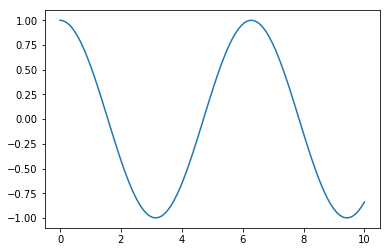

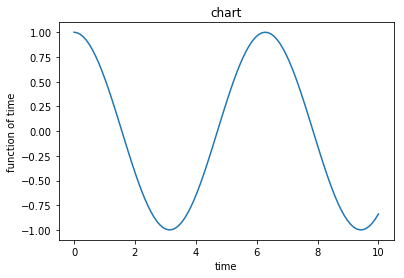

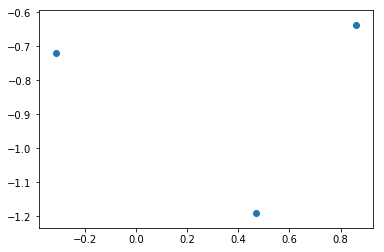

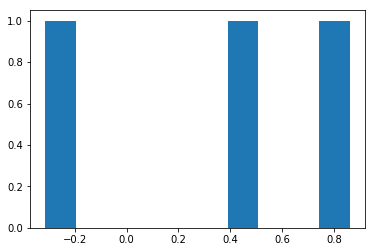

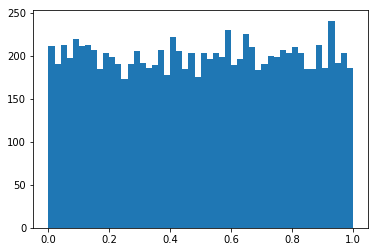

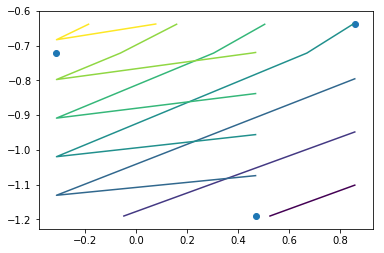

In [0]:
# ----------------
#  Library import
# ----------------
import matplotlib.pyplot as plt

# ------------
#  Basic plot
# ------------
# - Generating data -
#  np.linspace(start, end, number of points)
x = np.linspace(0, 10, 100) 
y = np.cos(x)

# - Iteration 1: Simple Plot - 
plt.plot(x,y)
plt.show()

# - Iteration 2: Addint Layers -
plt.plot(x,y)
plt.xlabel('time')
plt.ylabel('function of time')
plt.title('chart')
plt.show()

# ---------------
#  Scatter plot
# ---------------
# - Read in data -
m = pd.read_csv('sample_data.csv', header = None).as_matrix()

# - Coordinates -
x = m[:,0]
y = m[:,1]

# - Plot - 
plt.scatter(x,y)
plt.show()

# ------------
#  Histogram
# ------------
# - Iteration 1: Simple -
plt.hist(x)
plt.show()

# - Iteration 2: Adding Bins -
R = np.random.rand(10000)
plt.hist(R, bins=50)
plt.show()

# ---------------
#  Contour Plot
# ---------------
# - Library import -
import matplotlib.mlab as mlab

# - Setting up the grid -
delta = 0.25
X, Y = np.meshgrid(x, y)

# - Generating the z coord -
Z = mlab.bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)

# - Plotting the data -
plt.contour(X, Y, Z)
plt.scatter(x,y)
plt.show()

